# Lab 8- Decision Tree or Random Forest

## Decision Tree

#### 1. Use gini measure quality of split and build the decision tree. Record the model accuracy

In [222]:
# library to lead data in dataframes
import pandas as pd

# library for arrays
import numpy as np

# library for Descision Tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# library to create DecisionTree Graph
import pydotplus
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load the data in the pandas dataframe
dp = pd.read_csv('Dataset_heart-disease-dataset.csv')
# dp = dp.replace('?', '0.0')
dp = dp.replace('?', np.nan)
dp = dp.dropna()
X =  pd.get_dummies(dp.drop(columns=['result']))
Y = dp['result']
# split test data
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2,
                                                    random_state=5)

ds_gini = DecisionTreeClassifier(criterion='gini')
ds_fit = ds_gini.fit(X_train, Y_train)
gini = ds_gini.score(X_test,Y_test)
print(gini)
predict = ds_gini.predict(X_test)
print(accuracy_score(Y_test, predict))

0.6
0.6


#### 2. Visualize the decision tree built in Question-1

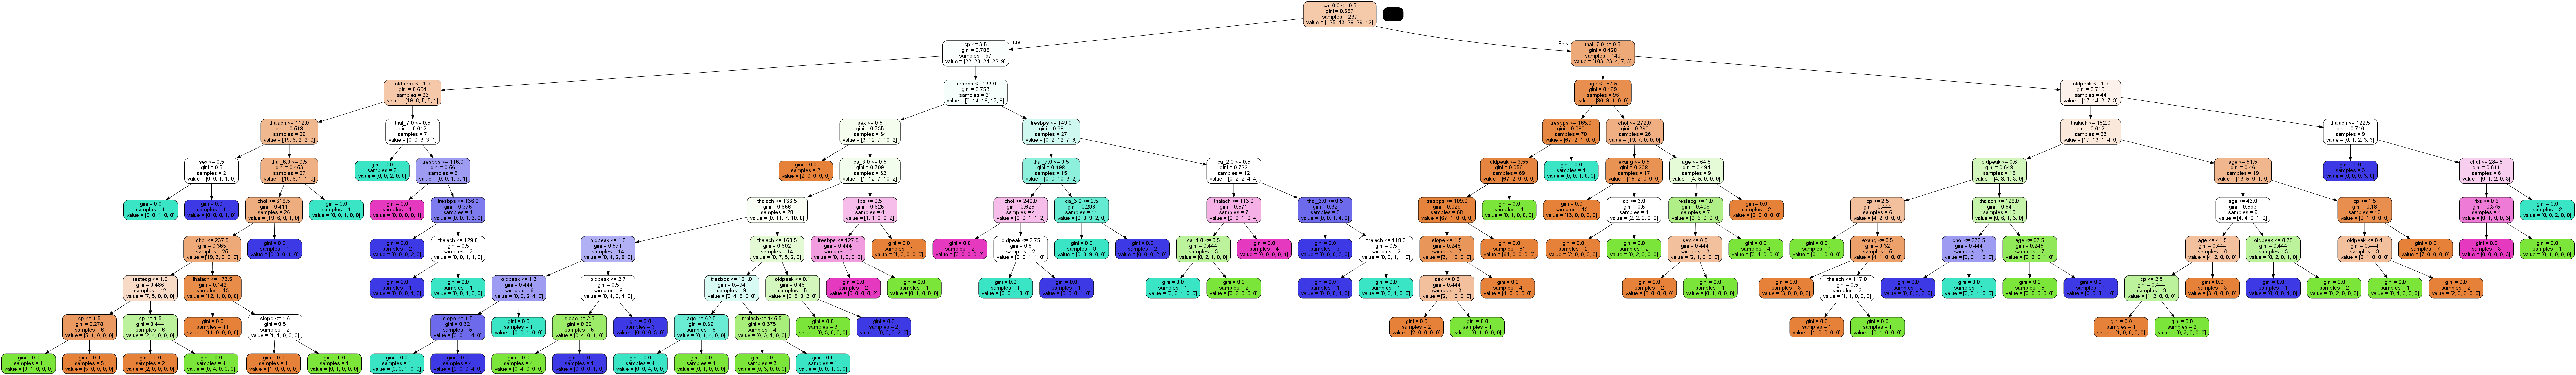

In [223]:
dot_data = export_graphviz(ds_fit, 
                           feature_names=list(X.columns.values),
                           rounded=True,
                           filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### 3. Change max_depth=3 and rebuild the decision tree. Record the model accuracy.

In [224]:
ds_gini = DecisionTreeClassifier(criterion='gini',max_depth=3)
ds_fit = ds_gini.fit(X_train, Y_train)
three_depth = ds_gini.score(X_test,Y_test)
print(three_depth)

0.6


#### 4. Visualize the decision tree built in Question-3

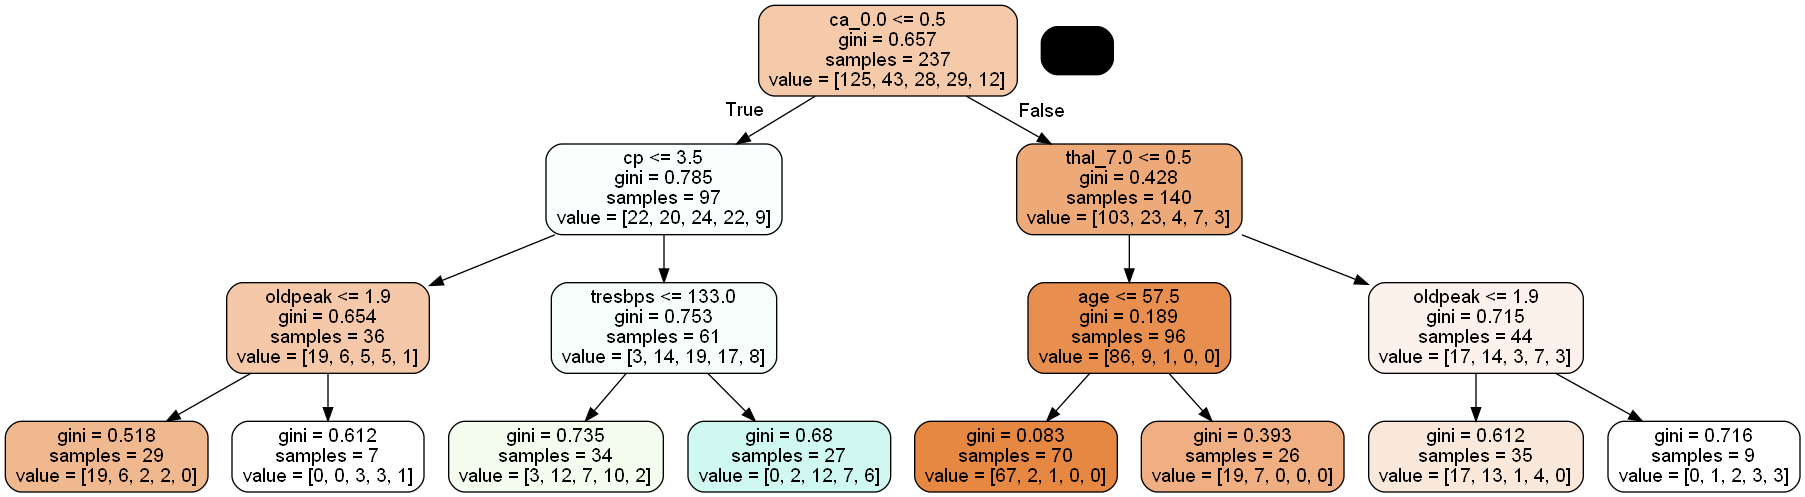

In [225]:
dot_data = export_graphviz(ds_fit, 
                           feature_names=list(X.columns.values),
                           rounded=True,
                           filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### 5. Use entropy measure quality of split and build the decision tree. Record the model accuracy.

In [226]:
ds_gini = DecisionTreeClassifier(criterion='entropy')
ds_fit = ds_gini.fit(X_train, Y_train)
entropy = ds_gini.score(X_test,Y_test)
print(entropy)

0.6166666666666667


#### 6. Visualize the decision tree built in Question-5

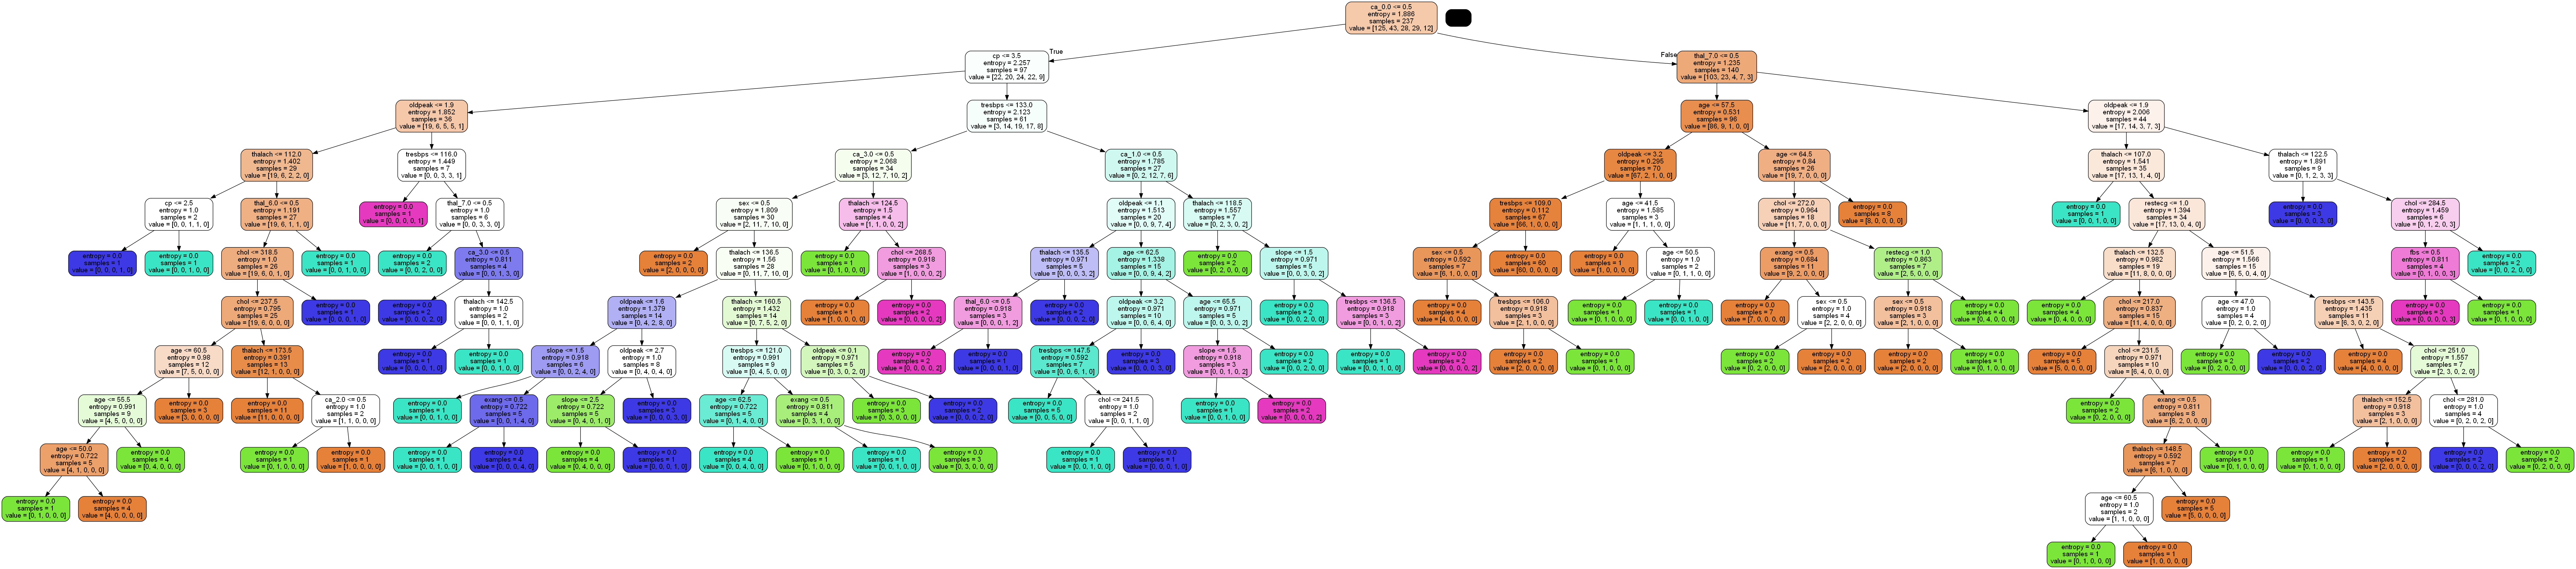

In [227]:
dot_data = export_graphviz(ds_fit, 
                           feature_names=list(X.columns.values),
                           rounded=True,
                           filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### 7. Compare all three decision trees using their accuracy

|Decision Tree|Accuracy|
|-------------|--------|
|Gini         |     0.6|
|3-Depth      |     0.6|
|Entropy      |    0.62|

The Entropy based decision tree was more accurate.